In [1]:
import xgboost as xgb

In [2]:
from xgboost import XGBRegressor as XGBR

In [3]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = load_boston()
x = data.data
y = data.target

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=42)

In [6]:
xgbr = XGBR(n_estimators=100).fit(xtrain, ytrain)
xgbr.predict(xtest)

array([24.778605 , 33.81824  , 16.406372 , 21.919922 , 16.906565 ,
       22.777987 , 17.356476 , 13.187293 , 20.986588 , 21.142221 ,
       20.54319  , 17.121996 ,  9.536354 , 21.091463 , 19.060402 ,
       25.708874 , 20.233723 , 10.601594 , 47.86842  , 15.67546  ,
       24.634136 , 24.914402 , 13.297937 , 23.103683 , 17.29109  ,
       14.3942995, 21.942911 , 12.735511 , 19.092672 , 20.922606 ,
       20.738443 , 23.78592  , 23.2116   , 21.518799 , 13.740487 ,
       16.88793  , 31.67158  , 18.544281 , 22.393078 , 24.590498 ,
       14.612399 , 27.65536  , 48.32444  , 18.866236 , 22.937452 ,
       13.490369 , 15.246323 , 24.50742  , 19.210526 , 28.331783 ,
       22.187742 , 34.691166 , 16.465988 , 27.75426  , 48.369026 ,
       21.04288  , 16.283424 , 32.370743 , 22.358805 , 18.022444 ,
       22.479692 , 34.404564 , 30.451216 , 17.837831 , 24.42846  ,
       15.181897 , 13.548869 , 22.872335 , 29.11238  , 14.93678  ,
       20.495413 , 29.009253 , 10.46218  , 19.606798 , 21.0167

In [8]:
mean_squared_error(ytest, xgbr.predict(xtest))

9.238913100991956

In [9]:
xgbr.feature_importances_

array([0.01608741, 0.00313967, 0.01446396, 0.00320105, 0.01002821,
       0.19327447, 0.01416495, 0.05734036, 0.00761811, 0.02587119,
       0.06298784, 0.00853149, 0.58329135], dtype=float32)

In [10]:
from sklearn.feature_selection import SelectFromModel

In [11]:
xtrain.shape

(354, 13)

In [18]:
XGB = XGBR(n_estimators=100)
cross_val_score(XGB, x, y, cv=5).mean()

0.6460769822362151

In [23]:
cross_val_score(XGB, xtrain, ytrain, cv=5).mean()

0.8224925637090423

In [29]:
RF = RFR()
cross_val_score(RF, x, y, cv=5).mean()

0.6418815146472963

In [40]:
xgbr = XGBR(n_estimator=10, silent=True)
cross_val_score(xgbr, xtrain, ytrain, cv=5, scoring="neg_mean_squared_error").mean()
#xgbr.fit(xtrain, ytrain)

-14.308849971080736

In [ ]:
from sklearn.model_selection import learning_curve

In [48]:
def plot(clf, x, y
        ,ax=None
        ,ylim=None
        ,cv=None
        ,n_jobs=None):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    import numpy as np
    n_train, train_score, test_score = learning_curve(clf, x, y
                                                      , shuffle=True
                                                      , cv=cv
                                                      , n_jobs=n_jobs )
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(n_train, np.mean(train_score, axis=1)
           , "o-", color="r", label="Training score")
    ax.plot(n_train, np.mean(test_score, axis=1)
           , "o-", color="g", label="Test score")
    ax.legend(loc="best")
    return ax

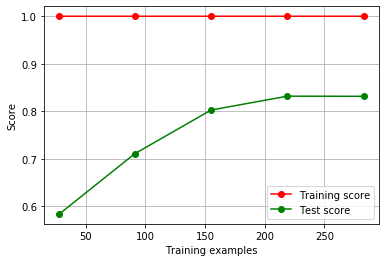

In [50]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
plot(XGBR(n_estimators=100, random_state=42), xtrain, ytrain
    , ax=None, cv=cv)
plt.show()
#可以看出来为过拟合

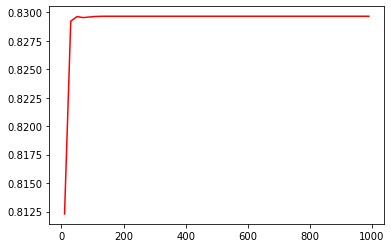

In [51]:
#画出n_estimators的学习曲线
rs = []
for i in range(10, 1010, 20):
    clf = XGBR(n_estimators=i, random_state=42)
    rs.append(cross_val_score(clf, xtrain, ytrain, cv=cv).mean())
plt.plot(range(10, 1010, 20), rs, c="red", label="XGB")
plt.show()

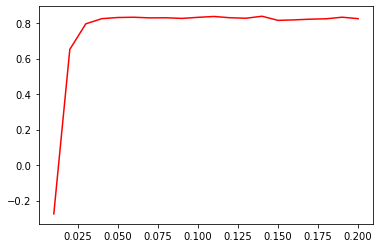

In [54]:
rs = []
lr = np.linspace(0.01, .2, 20)
for i in lr:
    clf = XGBR(n_estimators=100, learning_rate=i, random_state=42)
    rs.append(cross_val_score(clf, xtrain, ytrain, cv=cv).mean())
plt.plot(lr, rs, c="red", label="XGB")
plt.show()

### 使用xgboost来实现 

In [55]:
import xgboost as xgb

In [56]:
dtrain = xgb.DMatrix(xtrain, ytrain)
dtest = xgb.DMatrix(xtest, ytest)

In [59]:
params = {"silent":False, "objective":"reg:linear", "eta":.1}
num_round = 180

In [61]:
bst = xgb.train(params, dtrain, num_round)

[23:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [62]:
preds = bst.predict(dtest)

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(ytest, preds)

0.8811657213989036